In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv("/users/akumar496/downloads/Comcast_telecom_complaints_data.csv")

In [5]:
df.head()  #checking first 5 row of dataframe 

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [6]:
df['Date']=pd.to_datetime(df['Date'])  #converting date column from object to datetime datatype

In [7]:
df['month']=df['Date'].dt.month_name()  #getting month name from date column 

In [8]:
month_name=df.groupby('month').size() #getting total_complaints based on  each month using group by 
#or using df['month'].value_counts()

In [9]:
month_DataFrame=pd.DataFrame(month_name).reset_index()  #converting into Dataframe

In [10]:
month_DataFrame

,month,0
0,April,545
1,June,1280
2,May,399


In [11]:
month_DataFrame.rename(columns={0:'complaint_registered'},inplace= True) 
#renaming column name '0'as 'complaint_registered'

In [12]:
month_DataFrame

,month,complaint_registered
0,April,545
1,June,1280
2,May,399


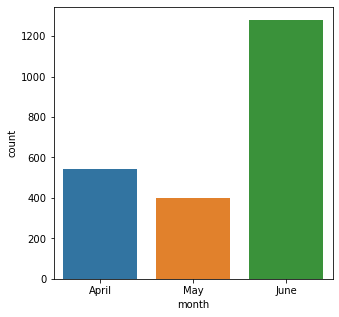

In [13]:
#month_DataFrame.plot(x='month',y='complaint_registered',kind='bar')
plt.figure(figsize=(5,5))
sns.countplot(x="month", data=df);
#Provide the trend chart for the number of complaints at monthly 

In [14]:
x=df.groupby('Date').size()

In [15]:
daily_Dataframe=pd.DataFrame(x).reset_index()

In [16]:
daily_Dataframe.rename(columns={0:'complaint_registered'}, inplace=True)

In [17]:
daily_Dataframe

,Date,complaint_registered
0,2015-04-01,18
1,2015-04-02,27
2,2015-04-03,15
3,2015-04-04,12
4,2015-04-05,6
...,...,...
86,2015-06-26,55
87,2015-06-27,39
88,2015-06-28,27
89,2015-06-29,51


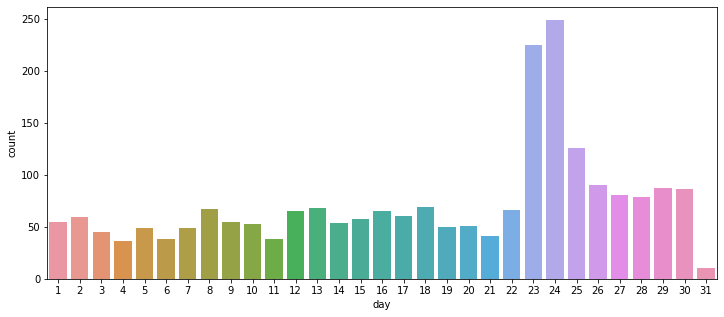

In [18]:
df['day'] = df['Date'].dt.day
plt.figure(figsize=(12,5))
sns.countplot(x="day", data=df);

#Provide the trend chart for the number of complaints at daily granularity levels.

#daily_Dataframe.plot(x='Date',y='complaint_registered');



In [19]:
daily_Dataframe.sort_values(by=['complaint_registered'],ascending=False)


,Date,complaint_registered
84,2015-06-24,218
83,2015-06-23,190
85,2015-06-25,98
86,2015-06-26,55
90,2015-06-30,53
...,...,...
46,2015-05-17,7
41,2015-05-12,7
4,2015-04-05,6
10,2015-04-11,5


In [20]:
df['Customer Complaint'].str.lower().value_counts()
#Provide a table with the frequency of complaint types.

comcast                                          102
comcast data cap                                  30
comcast internet                                  29
comcast data caps                                 21
comcast billing                                   18
                                                ... 
data capping and lack of options in tucson az      1
comcast slow speeds and lying about prices         1
data cap on internet downloads?                    1
overcharged for underperforming services           1
customer service & billing                         1
Name: Customer Complaint, Length: 1740, dtype: int64

In [21]:
from wordcloud import WordCloud, STOPWORDS
common_complaints = df['Customer Complaint'].dropna().tolist()
common_complaints =''.join(common_complaints).lower()

list_stops = ('Comcast','Now','Company','Day','Someone','Thing','Also','Got','Way','Call','Called','One','Said','Tell')

for word in list_stops:
    STOPWORDS.add(word)

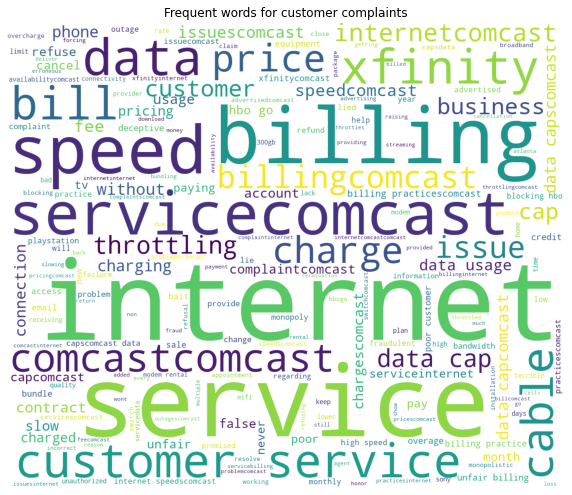

In [22]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=1200,
                      height=1000).generate(common_complaints)

plt.figure(figsize=(10,12) )
plt.imshow(wordcloud)
plt.title('Frequent words for customer complaints')
plt.axis('off')
plt.show()

#maximum comlaints related to internet followed by service and billing using word cloud 

In [23]:
df['new_status']=['Open' if st=="Open" or st=="Pending" else 'Closed' for st in df['Status']]
#Creating a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.

In [24]:
df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,month,day,new_status
0,250635,Comcast Cable Internet Speeds,2015-04-22,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,April,22,Closed
1,223441,Payment disappear - service got disconnected,2015-04-08,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,April,8,Closed
2,242732,Speed and Service,2015-04-18,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,April,18,Closed
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,2015-05-07,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,May,7,Open
4,307175,Comcast not working and no service to boot,2015-05-26,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,May,26,Closed


In [25]:
State_complain=df.groupby(['State','new_status'])['new_status'].count().unstack()
#Provide state wise status of complaints as open or closed 

In [26]:
State_complain

new_status,Closed,Open
State,,
Alabama,17.0,9.0
Arizona,14.0,6.0
Arkansas,6.0,NaN
California,159.0,61.0
Colorado,58.0,22.0
Connecticut,9.0,3.0
Delaware,8.0,4.0
District Of Columbia,14.0,2.0
District of Columbia,1.0,NaN


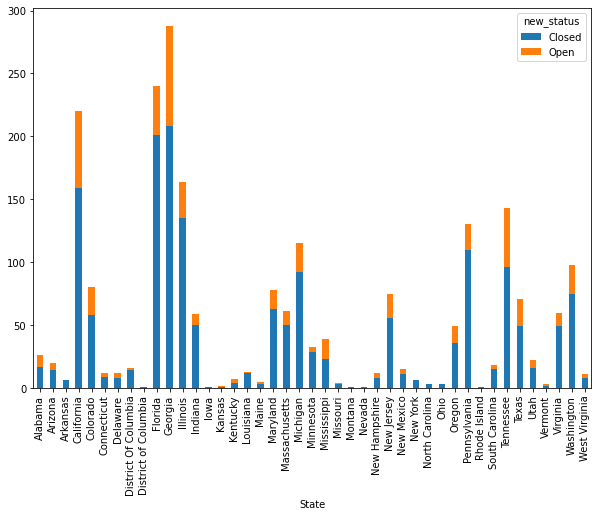

In [28]:
State_complain.plot.bar(stacked=True,figsize=(10,7));
#Provide state wise status of complaints in a stacked bar chart

In [35]:
df.groupby('State').size().sort_values(ascending= False)[0:5]

#grouping by state and sorting them in desending order to get state with max complaints 

State
Georgia       288
Florida       240
California    220
Illinois      164
Tennessee     143
dtype: int64

In [36]:
x=list(df.groupby('State').size().sort_values(ascending= False)[0:5]) #storing values i.e Number of complaints  in x variable

In [37]:
y=list(df.groupby('State').size().sort_values(ascending= False)[0:5].keys())

In [38]:
x

[288, 240, 220, 164, 143]

In [33]:
y

['Georgia', 'Florida', 'California', 'Illinois', 'Tennessee']

<BarContainer object of 5 artists>

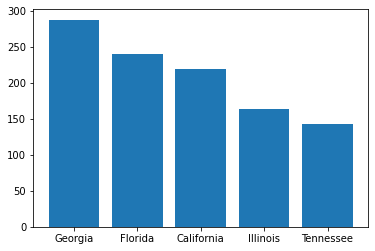

In [39]:
plt.bar(y,x)

In [31]:
unresolved_complaints=df.groupby(['State','new_status']).size().unstack().fillna(0).sort_values(by=['Open'],ascending= False)
#grouping state and status to find unresolved comlaints or open  for every state

In [32]:
unresolved_complaints

new_status,Closed,Open
State,,
Georgia,208.0,80.0
California,159.0,61.0
Tennessee,96.0,47.0
Florida,201.0,39.0
Illinois,135.0,29.0
Washington,75.0,23.0
Michigan,92.0,23.0
Colorado,58.0,22.0
Texas,49.0,22.0


In [33]:
unresolved_complaints['unresolved_cmp_percnt']=unresolved_complaints['Open']/unresolved_complaints['Open'].sum()*100

#finding percentage of open complaints in every state 

In [34]:
unresolved_complaints.sort_values(by=['unresolved_cmp_percnt'],ascending=False)

# state which  has the highest percentage of unresolved complaints

new_status,Closed,Open,unresolved_cmp_percnt
State,,,
Georgia,208.0,80.0,15.473888
California,159.0,61.0,11.798839
Tennessee,96.0,47.0,9.090909
Florida,201.0,39.0,7.543520
Illinois,135.0,29.0,5.609284
Washington,75.0,23.0,4.448743
Michigan,92.0,23.0,4.448743
Colorado,58.0,22.0,4.255319
Texas,49.0,22.0,4.255319


In [35]:
Resolved_data=df.groupby(['Received Via','new_status']).size().unstack()

In [36]:
Resolved_data['resolved_percnt']=Resolved_data['Closed']/Resolved_data['Closed'].sum()*100
#Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.

In [37]:
Resolved_data['resolved_percnt']

Received Via
Customer Care Call    50.615114
Internet              49.384886
Name: resolved_percnt, dtype: float64